<a href="https://colab.research.google.com/github/NikRed17/Dataset8/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
# Преобразование категориальных переменных
df['Gender'] = df['Gender'].astype('category')
df['BMI Category'] = df['BMI Category'].astype('category')
df['Sleep Disorder'] = df['Sleep Disorder'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')

In [ ]:
# Создадим бинарную переменную для уровня физической активности
df['activity_level'] = df['Physical Activity Level'].apply(
    lambda x: 'high' if x > df['Physical Activity Level'].median() else 'low'
)

In [ ]:
df.activity_level

,activity_level
0,low
1,low
2,low
3,low
4,low
...,...
369,high
370,high
371,high
372,high


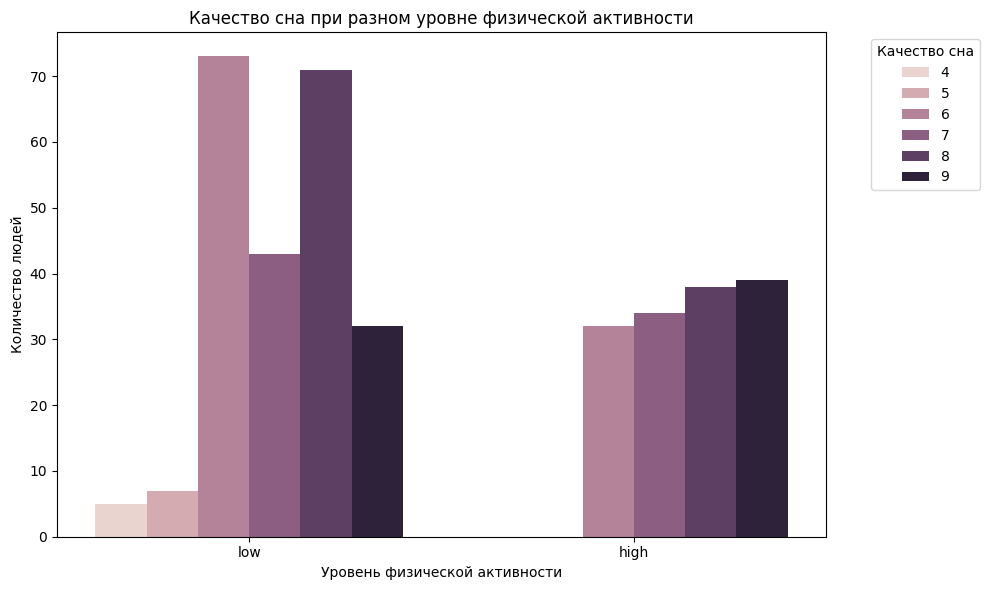

In [ ]:
# Визуализируем различия уровня активности и качества сна
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='activity_level', hue='Quality of Sleep')
plt.title('Качество сна при разном уровне физической активности')
plt.xlabel('Уровень физической активности')
plt.ylabel('Количество людей')
plt.legend(title='Качество сна', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

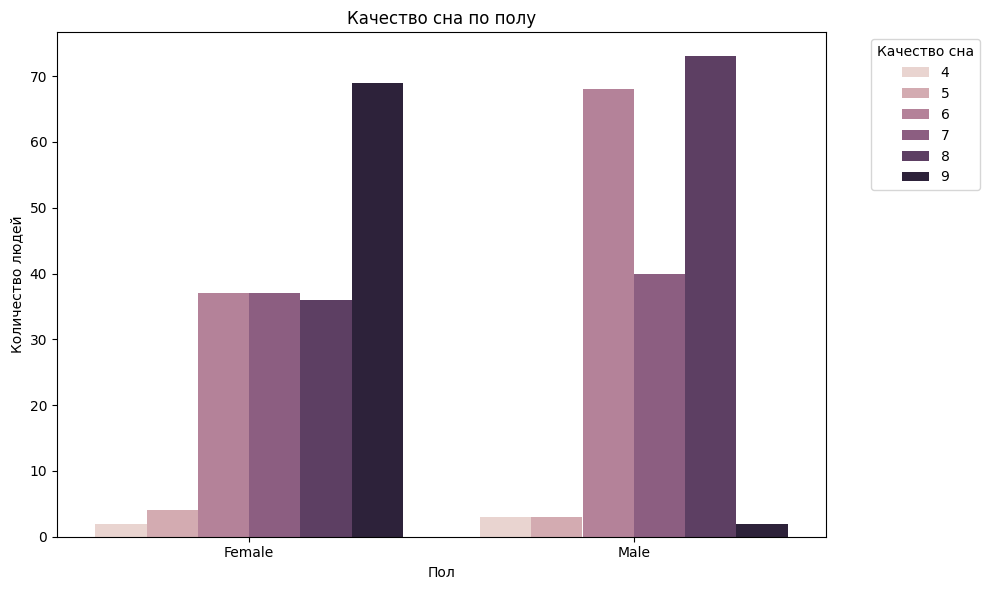

In [ ]:
# Визуализируем различия пола и качества сна
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Quality of Sleep')
plt.title('Качество сна по полу')
plt.xlabel('Пол')
plt.ylabel('Количество людей')
plt.legend(title='Качество сна', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

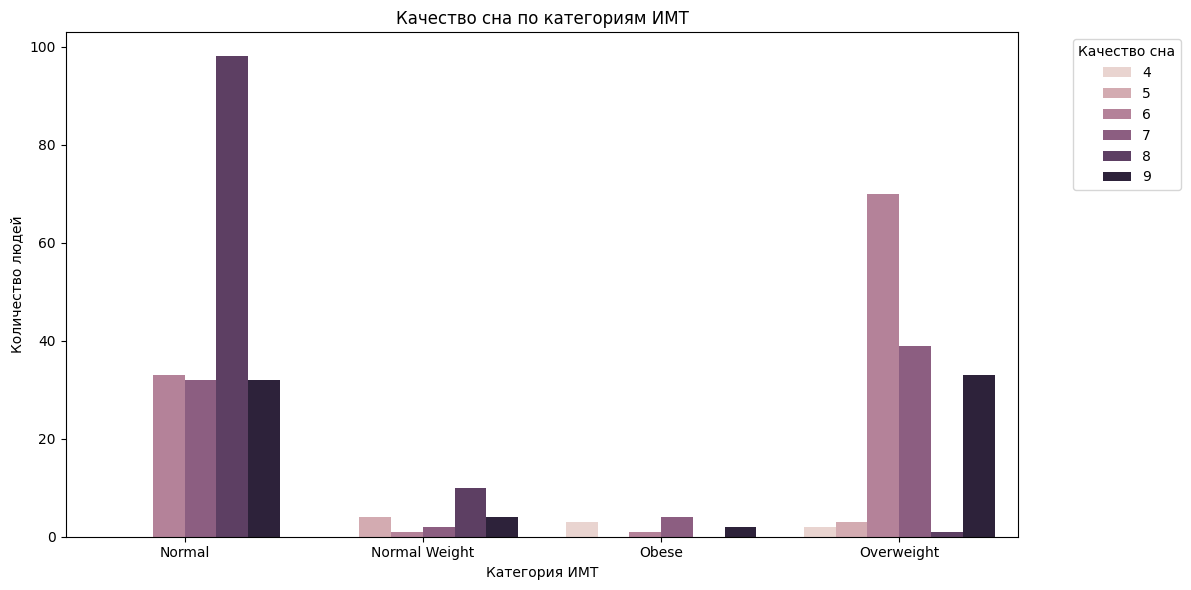

In [ ]:
# Визуализируем различия категории BMI и качества сна
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='BMI Category', hue='Quality of Sleep')
plt.title('Качество сна по категориям ИМТ')
plt.xlabel('Категория ИМТ')
plt.ylabel('Количество людей')
plt.legend(title='Качество сна', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Создадим таблицу сопряженности для активности и качества сна
# Для упрощения сгруппируем качество сна на низкое (1-5), среднее (6-7), высокое (8-10)
df['sleep_quality_group'] = pd.cut(df['Quality of Sleep'],
                                  bins=[0, 5, 7, 10],
                                  labels=['low', 'medium', 'high'])

table_activity = pd.crosstab(df['activity_level'], df['sleep_quality_group'])
print("Таблица сопряженности: Уровень активности vs Качество сна")
print(table_activity)

Таблица сопряженности: Уровень активности vs Качество сна
sleep_quality_group  low  medium  high
activity_level                        
high                   0      66    77
low                   12     116   103


In [ ]:
# Проверим зависимость между уровнем активности и качеством сна с помощью χ²
chi2_act, p_act, dof_act, expected_act = chi2_contingency(table_activity)
print(f"χ² = {chi2_act:.2f}")
print(f"p-value = {p_act}")
print(f"Степени свободы = {dof_act}")

if p_act < 0.05:
    print("Зависимость между уровнем активности и качеством сна СТАТИСТИЧЕСКИ ЗНАЧИМА")
else:
    print("Зависимость между уровнем активности и качеством сна НЕ ЗНАЧИМА")

χ² = 9.30
p-value = 0.009557473902655017
Степени свободы = 2
Зависимость между уровнем активности и качеством сна СТАТИСТИЧЕСКИ ЗНАЧИМА


In [ ]:
# Создадим таблицу сопряженности для пола и качества сна
table_gender = pd.crosstab(df['Gender'], df['sleep_quality_group'])
print("Таблица сопряженности: Пол vs Качество сна")
print(table_gender)

Таблица сопряженности: Пол vs Качество сна
sleep_quality_group  low  medium  high
Gender                                
Female                 6      74   105
Male                   6     108    75


In [ ]:
# Проверим зависимость между полом и качеством сна с помощью χ²
chi2_gen, p_gen, dof_gen, expected_gen = chi2_contingency(table_gender)
print(f"χ² = {chi2_gen:.2f}")
print(f"p-value = {p_gen}")
print(f"Степени свободы = {dof_gen}")

if p_gen < 0.05:
    print("Зависимость между полом и качеством сна СТАТИСТИЧЕСКИ ЗНАЧИМА")
else:
    print("Зависимость между полом и качеством сна НЕ ЗНАЧИМА")

χ² = 11.31
p-value = 0.003499690757583695
Степени свободы = 2
Зависимость между полом и качеством сна СТАТИСТИЧЕСКИ ЗНАЧИМА


In [ ]:
# Создадим таблицу сопряженности для BMI категории и нарушений сна
table_bmi = pd.crosstab(df['BMI Category'], df['Sleep Disorder'])
print("Таблица сопряженности: Категория ИМТ vs Нарушения сна")
print(table_bmi)

Таблица сопряженности: Категория ИМТ vs Нарушения сна
Sleep Disorder  Insomnia  Sleep Apnea
BMI Category                         
Normal                 7            5
Normal Weight          2            2
Obese                  4            6
Overweight            64           65


In [ ]:
# Проверим зависимость между BMI категорией и нарушениями сна с помощью χ²
chi2_bmi, p_bmi, dof_bmi, expected_bmi = chi2_contingency(table_bmi)
print(f"χ² = {chi2_bmi:.2f}")
print(f"p-value = {p_bmi}")
print(f"Степени свободы = {dof_bmi}")

if p_bmi < 0.05:
    print("Зависимость между категорией ИМТ и нарушениями сна СТАТИСТИЧЕСКИ ЗНАЧИМА")
else:
    print("Зависимость между категорией ИМТ и нарушениями сна НЕ ЗНАЧИМА")

χ² = 0.73
p-value = 0.8650218472482435
Степени свободы = 3
Зависимость между категорией ИМТ и нарушениями сна НЕ ЗНАЧИМА


In [ ]:
# Нормализация числовых признаков - сравним Sleep Duration и Daily Steps и Physical Activity Level
print("Сравнение масштабов признаков:")
print(f"Sleep Duration: mean={df['Sleep Duration'].mean():.2f}, std={df['Sleep Duration'].std():.2f}")
print(f"Daily Steps: mean={df['Daily Steps'].mean():.2f}, std={df['Daily Steps'].std():.2f}")
print(f"Physical Activity Level: mean={df['Physical Activity Level'].mean():.2f}, std={df['Physical Activity Level'].std():.2f}")

Сравнение масштабов признаков:
Sleep Duration: mean=7.13, std=0.80
Daily Steps: mean=6816.84, std=1617.92
Physical Activity Level: mean=59.17, std=20.83


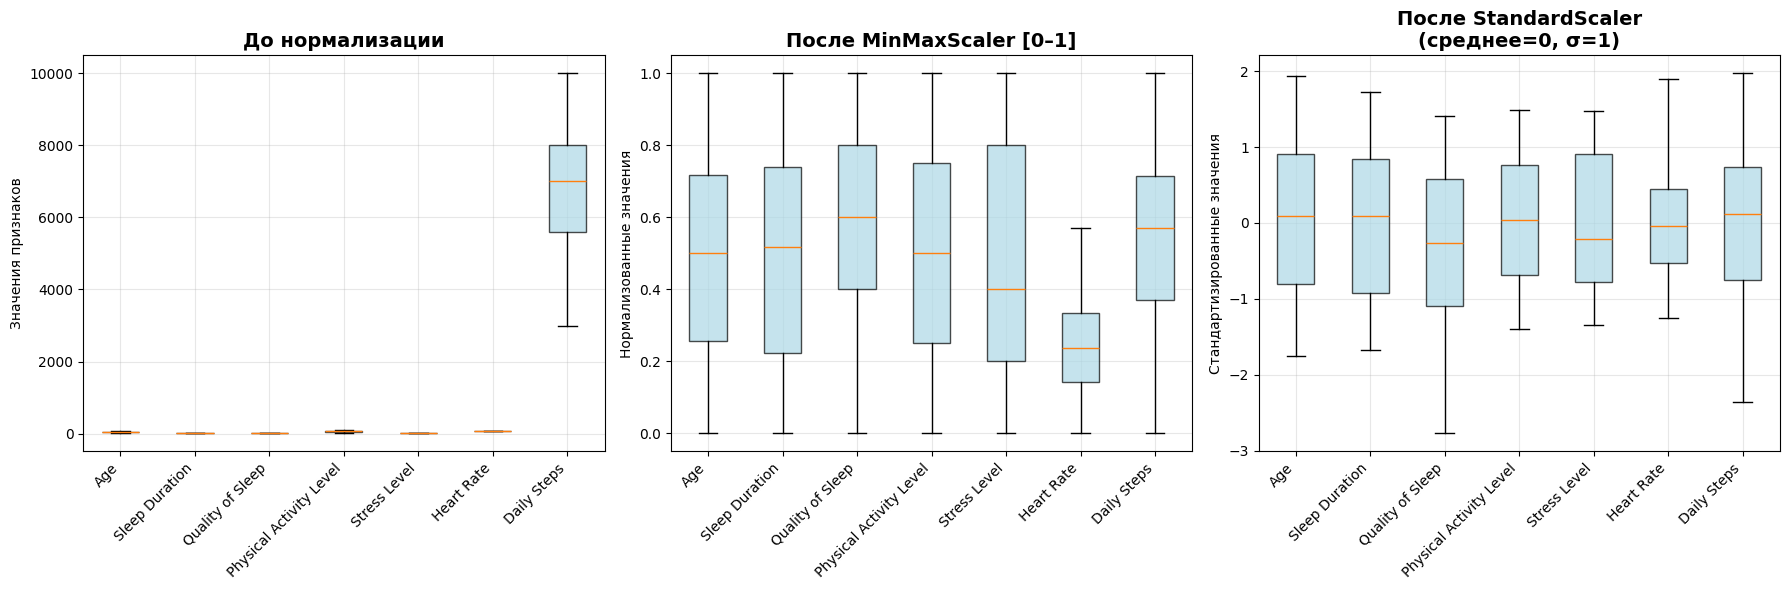

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Берем все числовые признаки
num_df = df.select_dtypes(include=[int, float]).copy()

# Удаляем столбец Person ID, так как это идентификатор, а не признак
if 'Person ID' in num_df.columns:
    num_df = num_df.drop(columns=['Person ID'])
# --- Применяем два метода нормализации ---
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(num_df), columns=num_df.columns)
std_scaled = pd.DataFrame(std_scaler.fit_transform(num_df), columns=num_df.columns)

# --- Визуализация ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# До нормализации
box1 = axes[0].boxplot(num_df.values, showfliers=False, patch_artist=True)
axes[0].set_title("До нормализации", fontsize=14, fontweight='bold')
axes[0].set_xticks(range(1, len(num_df.columns)+1))
axes[0].set_xticklabels(num_df.columns, rotation=45, ha='right')
axes[0].set_ylabel('Значения признаков')
axes[0].grid(True, alpha=0.3)

# После MinMaxScaler
box2 = axes[1].boxplot(minmax_scaled.values, showfliers=False, patch_artist=True)
axes[1].set_title("После MinMaxScaler [0–1]", fontsize=14, fontweight='bold')
axes[1].set_xticks(range(1, len(num_df.columns)+1))
axes[1].set_xticklabels(num_df.columns, rotation=45, ha='right')
axes[1].set_ylabel('Нормализованные значения')
axes[1].grid(True, alpha=0.3)

# После StandardScaler
box3 = axes[2].boxplot(std_scaled.values, showfliers=False, patch_artist=True)
axes[2].set_title("После StandardScaler\n(среднее=0, σ=1)", fontsize=14, fontweight='bold')
axes[2].set_xticks(range(1, len(num_df.columns)+1))
axes[2].set_xticklabels(num_df.columns, rotation=45, ha='right')
axes[2].set_ylabel('Стандартизированные значения')
axes[2].grid(True, alpha=0.3)

# Добавляем цвета для лучшей визуализации
for box in [box1, box2, box3]:
    for patch in box['boxes']:
        patch.set_facecolor('lightblue')
        patch.set_alpha(0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Задача классификации для качества сна
y = df['Sleep Disorder']
X = df.drop(columns=['Sleep Disorder', 'Quality of Sleep'])  # Исключаем целевую и исходную переменную качества сна


In [ ]:
X

,Person ID,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,activity_level,sleep_quality_group
0,1,Male,27,Software Engineer,6.1,42,6,Overweight,126/83,77,4200,low,medium
1,2,Male,28,Doctor,6.2,60,8,Normal,125/80,75,10000,low,medium
2,3,Male,28,Doctor,6.2,60,8,Normal,125/80,75,10000,low,medium
3,4,Male,28,Sales Representative,5.9,30,8,Obese,140/90,85,3000,low,low
4,5,Male,28,Sales Representative,5.9,30,8,Obese,140/90,85,3000,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,75,3,Overweight,140/95,68,7000,high,high
370,371,Female,59,Nurse,8.0,75,3,Overweight,140/95,68,7000,high,high
371,372,Female,59,Nurse,8.1,75,3,Overweight,140/95,68,7000,high,high
372,373,Female,59,Nurse,8.1,75,3,Overweight,140/95,68,7000,high,high


In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

# --- 1. Разделяем признаки на числовые и не числовые ---
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()     # числовые
cat_label = ['Gender']                                                        # для LabelEncoder
cat_onehot = ['activity_level', 'BMI Category', 'Occupation']                 # для OneHotEncoder

print("Числовые признаки:", num_cols)
print("Категориальные для LabelEncoder:", cat_label)
print("Категориальные для OneHotEncoder:", cat_onehot)

Числовые признаки: ['Person ID', 'Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
Категориальные для LabelEncoder: ['Gender']
Категориальные для OneHotEncoder: ['activity_level', 'BMI Category', 'Occupation']


In [ ]:
# --- 2. Кодирование категориальных признаков ---
# LabelEncoder для признака "Gender"
le = LabelEncoder()
X['Gender_encoded'] = le.fit_transform(X['Gender'])  # Male→0, Female→1

print("Кодирование Gender:")
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"  {original} → {encoded}")

Кодирование Gender:
  Female → 0
  Male → 1


In [ ]:
# OneHotEncoder для activity_level, BMI Category, Occupation
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' убирает лишнюю колонку
categorical_encoded = pd.DataFrame(
    ohe.fit_transform(X[cat_onehot]),
    columns=ohe.get_feature_names_out(cat_onehot)
)

# Объединяем всё в один датафрейм
X_processed = pd.concat([X[num_cols], X['Gender_encoded'], categorical_encoded], axis=1)

# --- 3. Нормализация числовых признаков ---
scaler = MinMaxScaler()
X_processed[num_cols] = scaler.fit_transform(X_processed[num_cols])

# --- 4. Проверим результат ---
print("Форма данных после преобразований:", X_processed.shape)
print("\nПервые 5 строк после преобразований:")
X_processed.head()

Форма данных после преобразований: (374, 22)

Первые 5 строк после преобразований:


,Person ID,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_encoded,activity_level_low,BMI Category_Normal Weight,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,0.000000,0.00000,0.111111,0.2,0.6,0.571429,0.171429,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.002681,0.03125,0.148148,0.5,1.0,0.476190,1.000000,1,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.005362,0.03125,0.148148,0.5,1.0,0.476190,1.000000,1,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.008043,0.03125,0.037037,0.0,1.0,0.952381,0.000000,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.010724,0.03125,0.037037,0.0,1.0,0.952381,0.000000,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Удалим строки с NaN значениями
nan_mask = X_processed.isnull().any(axis=1) | y.isnull()
# Удаляем строки с NaN
X_processed_clean = X_processed[~nan_mask]
y_clean = y[~nan_mask]


In [ ]:
from sklearn.linear_model import LogisticRegression

# Разделение на тренировочную и тестовую выборки (после очистки от NaN)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_clean, y_clean, test_size=0.3, random_state=42, stratify=y_clean
)

print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"\nРаспределение целевой переменной в тренировочной выборке:")
print(y_train.value_counts(normalize=True))

Размер тренировочной выборки: (108, 22)
Размер тестовой выборки: (47, 22)

Распределение целевой переменной в тренировочной выборке:
Sleep Disorder
Insomnia       0.5
Sleep Apnea    0.5
Name: proportion, dtype: float64


In [ ]:
# Объявим модель логистической регрессии
model = LogisticRegression(
    penalty=None,  # регуляризация (добавление штрафа за большие коэффициенты)
    random_state=42,
    max_iter=1000
)

# Обучаем модель
model.fit(X_train, y_train)

print("Модель логистической регрессии обучена!")

Модель логистической регрессии обучена!


In [ ]:
y_pred = model.predict(X_test)
y_pred


array(['Sleep Apnea', 'Sleep Apnea', 'Sleep Apnea', 'Insomnia',
       'Insomnia', 'Sleep Apnea', 'Sleep Apnea', 'Insomnia',
       'Sleep Apnea', 'Insomnia', 'Insomnia', 'Sleep Apnea', 'Insomnia',
       'Insomnia', 'Insomnia', 'Insomnia', 'Insomnia', 'Sleep Apnea',
       'Sleep Apnea', 'Sleep Apnea', 'Insomnia', 'Sleep Apnea',
       'Insomnia', 'Sleep Apnea', 'Insomnia', 'Sleep Apnea',
       'Sleep Apnea', 'Insomnia', 'Insomnia', 'Insomnia', 'Sleep Apnea',
       'Insomnia', 'Sleep Apnea', 'Sleep Apnea', 'Sleep Apnea',
       'Sleep Apnea', 'Sleep Apnea', 'Sleep Apnea', 'Sleep Apnea',
       'Insomnia', 'Insomnia', 'Sleep Apnea', 'Sleep Apnea',
       'Sleep Apnea', 'Insomnia', 'Insomnia', 'Insomnia'], dtype=object)

In [ ]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 3.30485091e-117],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 6.57841630e-093],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 1.60903326e-062],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 5.34188494e-023],
       [1.00000000e+000, 7.59997749e-083],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 8.94871802e-091],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 2.82888806e-091],
       [0.0

In [ ]:
for i in range(10):
  print([round(float(item), 2) for item in list(y_pred_proba[i] * 100)])

[0.0, 100.0]
[0.0, 100.0]
[0.0, 100.0]
[100.0, 0.0]
[100.0, 0.0]
[0.0, 100.0]
[0.0, 100.0]
[100.0, 0.0]
[0.0, 100.0]
[100.0, 0.0]


In [ ]:
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [ ]:

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)
import numpy as np

def evaluate_classification(y_true, y_pred, y_proba=None):

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # ROC-AUC (если переданы вероятности)
    roc_auc = None
    if y_proba is not None:
        # Если многоклассовая классификация — One-vs-Rest
        classes = np.unique(y_true)
        y_true_onehot = np.eye(len(classes))[np.searchsorted(classes, y_true)]
        roc_auc = roc_auc_score(y_true_onehot, y_proba, multi_class='ovr')

    cm = confusion_matrix(y_true, y_pred)

    print("=== Метрики классификации ===")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC:   {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc,
        "confusion_matrix": cm
    }


In [ ]:
metrics = evaluate_classification(y_train, y_train_pred, y_train_proba)

=== Метрики классификации ===
Accuracy:  0.9815
Precision: 0.9815
Recall:    0.9815
F1-score:  0.9815
ROC-AUC:   0.9997

Confusion Matrix:
[[53  1]
 [ 1 53]]


Accuracy = 0.9815 - модель правильно предсказывает оценки в 98% случаев

Precision = 0.9815 - когда модель предсказывает оценку, она права в 98% случаев

Recall = 0.9815 - находит 98% реальных случаев

F1-score = 0.9815 - модель сбалансирована

ROC-AUC = 0.9997 - модель отлично разделяет классы (близко к 1.0)

In [ ]:
metrics = evaluate_classification(y_test, y_pred, y_proba)

=== Метрики классификации ===
Accuracy:  0.8936
Precision: 0.8942
Recall:    0.8936
F1-score:  0.8935
ROC-AUC:   0.8981

Confusion Matrix:
[[20  3]
 [ 2 22]]


Accuracy = 0.8936 - модель правильно предсказывает оценки в 89% случаев

Precision = 0.8942 - когда модель предсказывает оценку, она права в 89% случаев

Recall = 0.8936 - находит 89% реальных случаев

F1-score = 0.8935 - модель сбалансирована

ROC-AUC = 0.8981 - модель отлично разделяет классы (близко к 1.0)

In [ ]:
model.coef_

array([[  143.18556897, -1146.81901901,   689.8756669 ,   -82.16185288,
         -313.22389063,  1377.16668904,  1440.91009716,  -220.51159714,
          637.50627322, -1603.33158498,   234.39198815,  -209.17615584,
          838.22900617,   859.04965227,   341.66124804,     0.        ,
         1842.35579448,   793.57613819,  -706.68938049,   684.20335931,
        -1023.76202052,   973.74429358]])

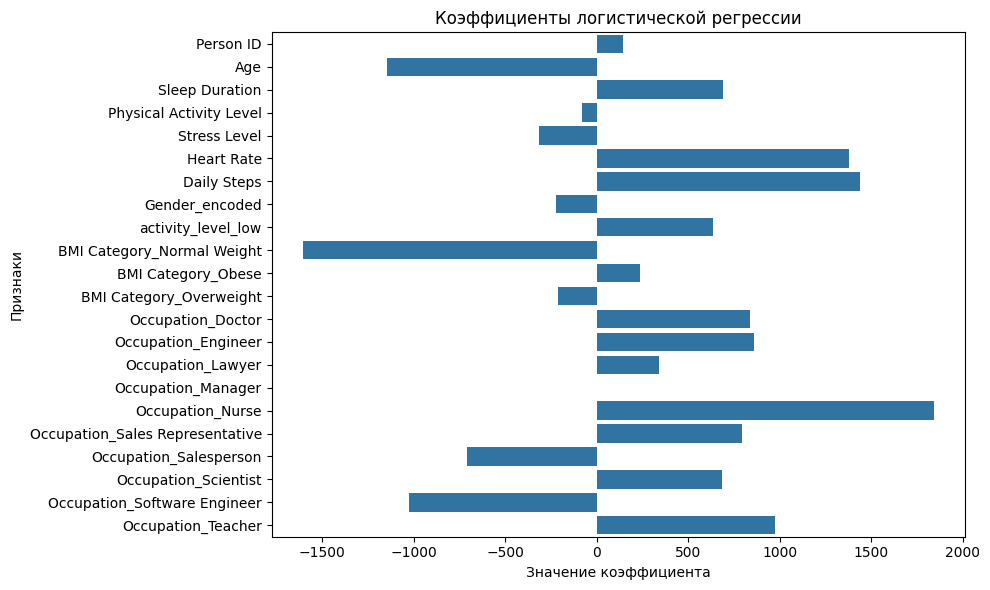

In [ ]:
feature_names = X_processed_clean.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=model.coef_[0], y=feature_names, orient="h")
plt.xlabel("Значение коэффициента")
plt.ylabel("Признаки")
plt.title("Коэффициенты логистической регрессии")
plt.tight_layout()
plt.show()


Коэффициенты показывают влияние каждого признака на предсказание нарушения сна

Ключевые наблюдения из графика:

Наиболее влиятельные положительные признаки:

Occupation_Nurse (1842) - самая сильная положительная связь

Daily Steps (1440) - количество шагов сильно влияет на результат

Heart Rate (1377) - частота сердечных сокращений

Наиболее влиятельные отрицательные признаки:

BMI Category_Normal Weight (-1603) - сильная отрицательная связь

Occupation_Salesperson (-1023)